In [13]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Loads training and testing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
# Prepares training data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
train_labels = to_categorical(train_labels)

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255
test_labels = to_categorical(test_labels)

# Splits training data further into training and validation data sets
val_images = train_images[50000:]
train_images = train_images[:50000]

val_labels = train_labels[50000:]
train_labels = train_labels[:50000]

In [7]:
# Creates ConvNet model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Trains model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
                   validation_data=(val_images, val_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 18s 366us/step - loss: 0.1851 - accuracy: 0.9422 - val_loss: 0.0772 - val_accuracy: 0.9760
Epoch 2/5
50000/50000 [==============================] - 18s 367us/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.0479 - val_accuracy: 0.9871
Epoch 3/5
50000/50000 [==============================] - 18s 369us/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0368 - val_accuracy: 0.9901
Epoch 4/5
50000/50000 [==============================] - 19s 371us/step - loss: 0.0252 - accuracy: 0.9917 - val_loss: 0.0396 - val_accuracy: 0.9895
Epoch 5/5
50000/50000 [==============================] - 19s 372us/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0395 - val_accuracy: 0.9898


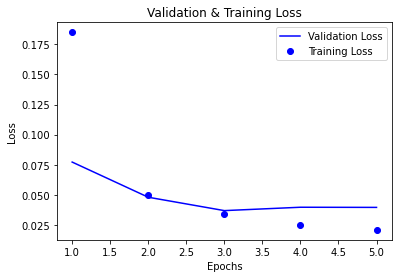

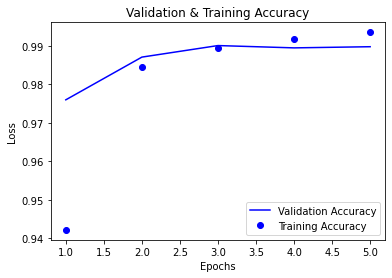

In [9]:
# Evaluates training and validation performance

history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)

val_loss = history_dict["val_loss"]
train_loss = history_dict["loss"]

val_accuracy = history_dict["val_accuracy"]
train_accuracy = history_dict["accuracy"]

plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")
plt.show()

plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.plot(epochs, train_accuracy, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Accuracy")
plt.show()

In [10]:
# Combines back both training and validation and retrains final model

train_images = np.append(train_images, val_images, axis=0)
train_labels = np.append(train_labels, val_labels, axis=0)

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 19s 318us/step - loss: 0.0165 - accuracy: 0.9952
Epoch 2/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0117 - accuracy: 0.9965
Epoch 3/5
60000/60000 [==============================] - 19s 320us/step - loss: 0.0093 - accuracy: 0.9972
Epoch 4/5
60000/60000 [==============================] - 19s 324us/step - loss: 0.0077 - accuracy: 0.9973
Epoch 5/5
60000/60000 [==============================] - 20s 329us/step - loss: 0.0065 - accuracy: 0.9980


In [11]:
# Evaluates model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Testing Loss: ", test_loss, ", Testing Accuracy: ", test_accuracy)

10000/10000 [==============================] - 1s 147us/step
Testing Loss:  0.032281635216591095 , Testing Accuracy:  0.9925000071525574
